In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
size = 256
images = []
i=0
for file in os.listdir("bolek"):
    image = cv2.imread(f"bolek/{file}")
    image = cv2.resize(image, (size,size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
images = np.array(images)
images = images.astype('float32') / 255.0

print('loaded training images',len(images))

loaded training images 1640


In [3]:
# create BW images
bwImages = []
for i in range(images.shape[0]):
    m = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    bwImages.append(m)
bwImages = np.array(bwImages)
bwImages = np.expand_dims(bwImages,3)
print(bwImages.shape)

(1640, 256, 256, 1)


Black&White


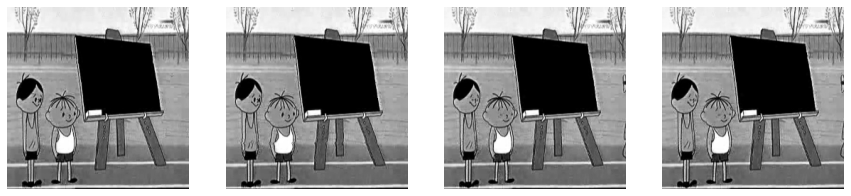

Color


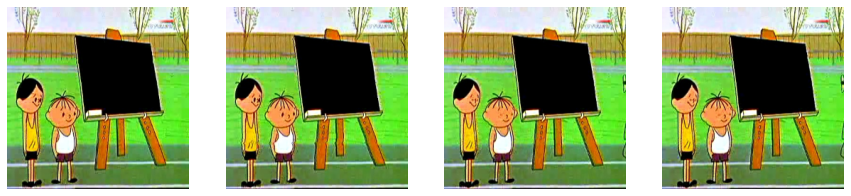

In [4]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
n = 4
x = 1
print("Black&White")
for i in range(n):
    ax = plt.subplot(1,n, x)
    x = x + 1
    plt.imshow(bwImages[i],cmap='gray')
    plt.axis("off")
plt.show()
plt.figure(figsize=(15, 15))
x = 1
print("Color")
for i in range(n):
    ax = plt.subplot(1,n, x)
    x = x + 1
    plt.imshow(images[i])
    plt.axis("off")
plt.show()

In [5]:
import random
def show_images(bwImages,realImages,number_of_images=3,fig_size=(12,12)):
    n=number_of_images
    rnd = random.sample(range(realImages.shape[0]), n)

    plt.figure(figsize=fig_size)
    print('Black&White images')
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(bwImages[rnd[i]],cmap='gray')
        plt.axis("off")
    plt.show()

    resultImages = autoencoder.predict(bwImages)
    plt.figure(figsize=fig_size)
    print('Colorized BW images')
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(tf.clip_by_value(resultImages[rnd[i]], 0.0, 1.0))
        plt.axis("off")
    plt.show()

    plt.figure(figsize=fig_size)
    print('Original images')
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(realImages[rnd[i]])
        plt.axis("off")
    plt.show()


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.layers import UpSampling2D, LeakyReLU, Conv2DTranspose, Concatenate
from tensorflow.keras.initializers import RandomNormal

def colorize_model(image_shape):
    conv_args = {"activation": "relu","padding": "same", "kernel_size": (3,3)}
    input_img = Input(shape=image_shape)
    x = Conv2D(filters = 16, **conv_args)(input_img)
    x = Conv2D(filters = 32, **conv_args)(x)
    x = Conv2D(filters = 64, **conv_args)(x)
    x = Dense(10)(x)
    output_img = Conv2D(3, (3, 3),  padding='same')(x)
    model = Model(input_img, output_img)
    return model

import autoencoder_models
autoencoder = autoencoder_models.unet_model((None,None,3))
#autoencoder = colorize_model((None,None,1))

autoencoder.summary()
optimizer = tf.keras.optimizers.Adam()
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, None, None, 6 3136        input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, None, None, 6 0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, None, None, 1 131200      leaky_re_lu[0][0]                
____________________________________________________________________________________________

In [10]:
# add two channels to BW images - necessary for our UNET model!
print(bwImages.shape)
bwImages = np.concatenate((bwImages,bwImages,bwImages),axis=3)
print(bwImages.shape)

(1640, 256, 256, 1)
(1640, 256, 256, 3)


820/820 [==============================] - 89s 104ms/step - loss: 0.6092
Epoch 0
Black&White images


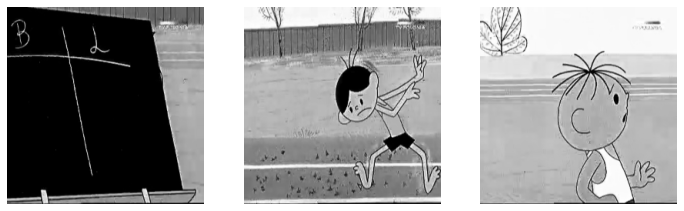

Colorized BW images


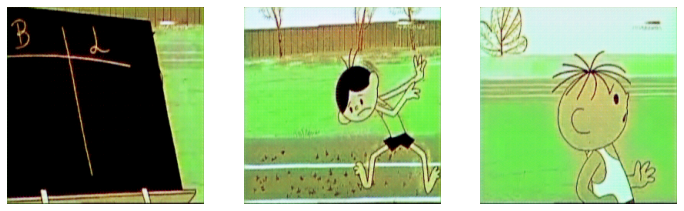

Original images


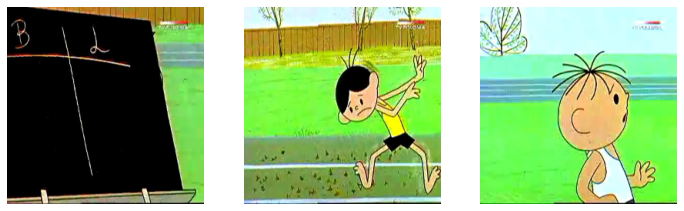

820/820 [==============================] - 85s 104ms/step - loss: 0.4706
Epoch 1
Black&White images


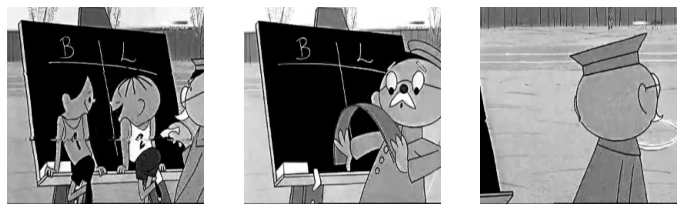

Colorized BW images


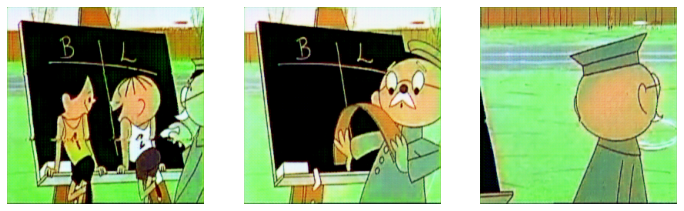

Original images


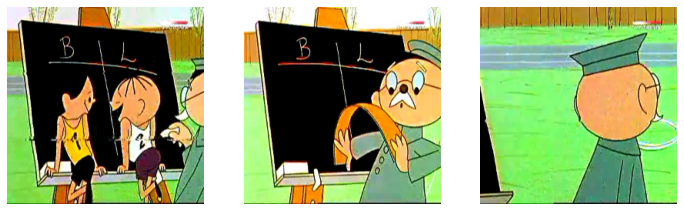

820/820 [==============================] - 86s 104ms/step - loss: 0.4592
Epoch 2
Black&White images


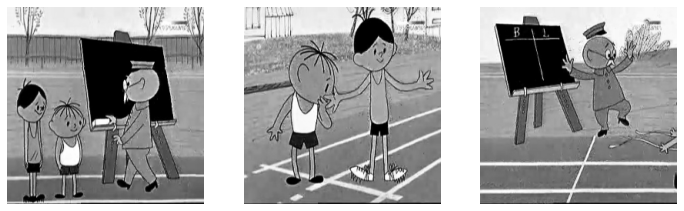

Colorized BW images


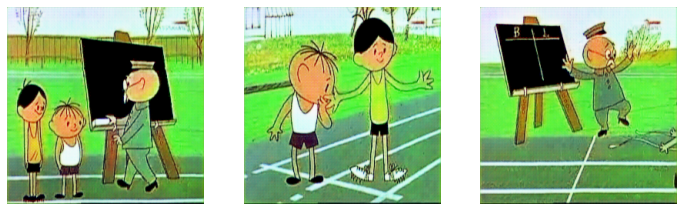

Original images


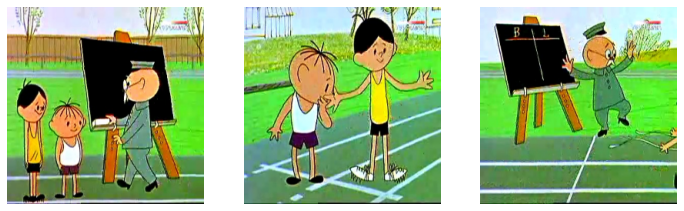

820/820 [==============================] - 86s 104ms/step - loss: 0.4549
Epoch 3
Black&White images


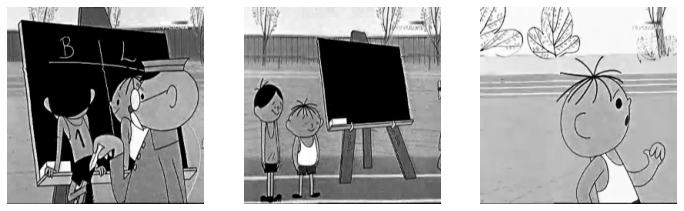

Colorized BW images


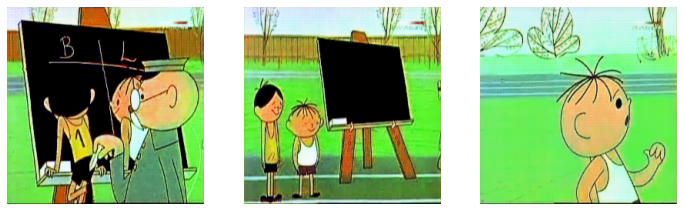

Original images


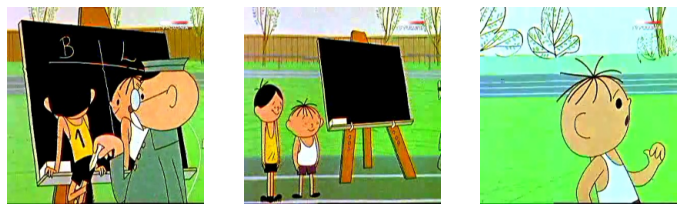

820/820 [==============================] - 86s 104ms/step - loss: 0.4524
Epoch 4
Black&White images


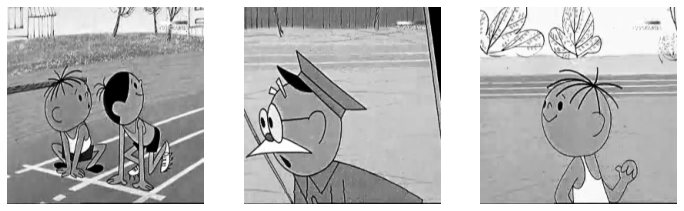

Colorized BW images


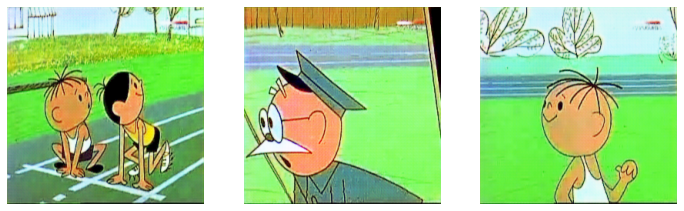

Original images


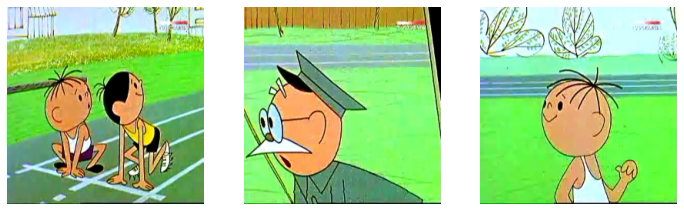

820/820 [==============================] - 85s 104ms/step - loss: 0.4568
Epoch 5
Black&White images


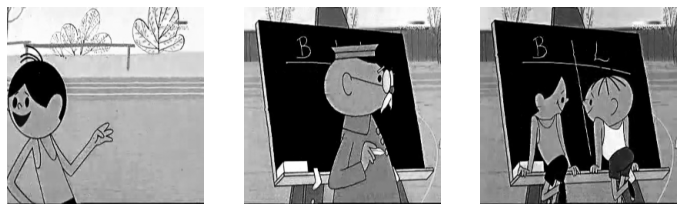

Colorized BW images


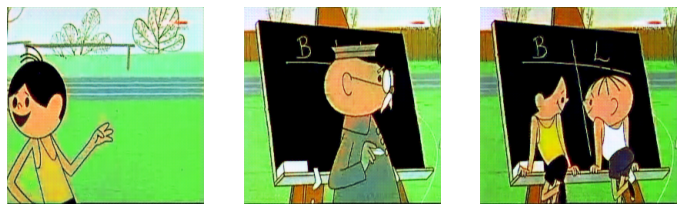

Original images


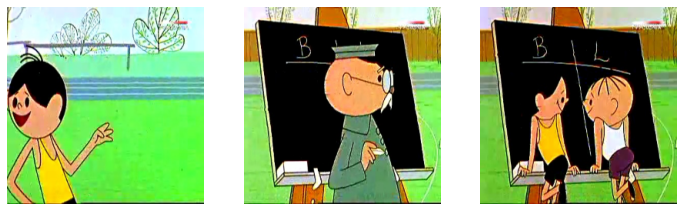

820/820 [==============================] - 85s 104ms/step - loss: 0.4507
Epoch 6
Black&White images


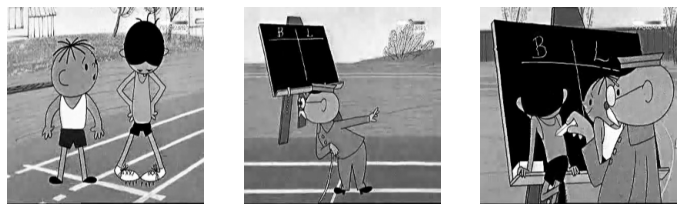

Colorized BW images


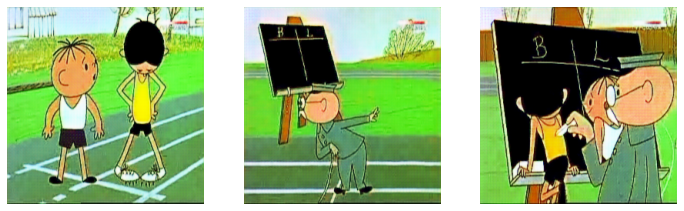

Original images


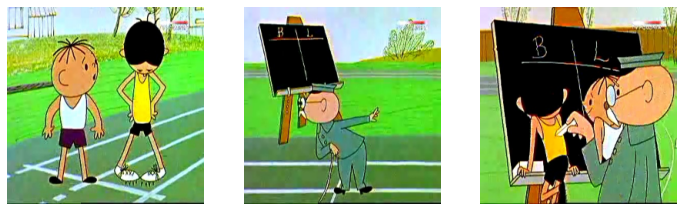

820/820 [==============================] - 85s 104ms/step - loss: 0.4492
Epoch 7
Black&White images


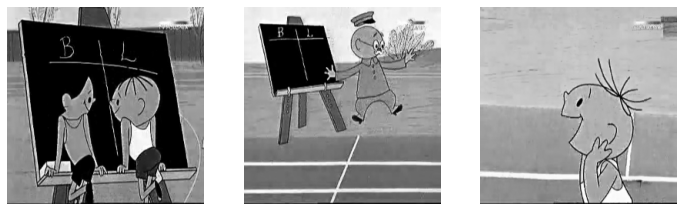

Colorized BW images


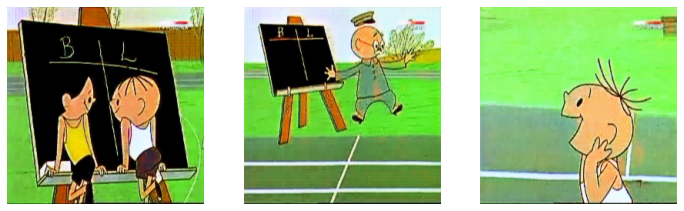

Original images


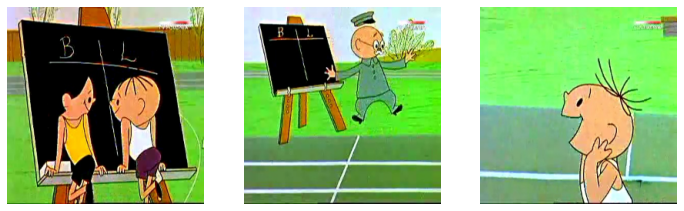

820/820 [==============================] - 85s 104ms/step - loss: 0.4466
Epoch 8
Black&White images


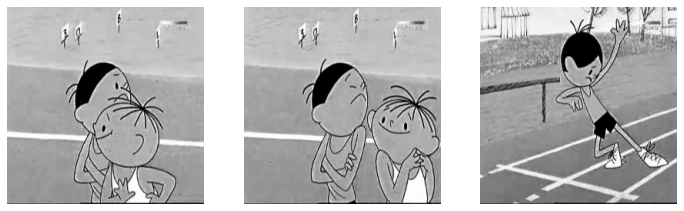

Colorized BW images


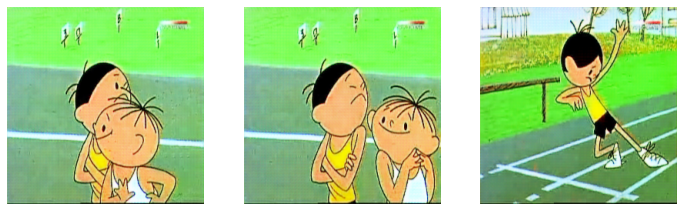

Original images


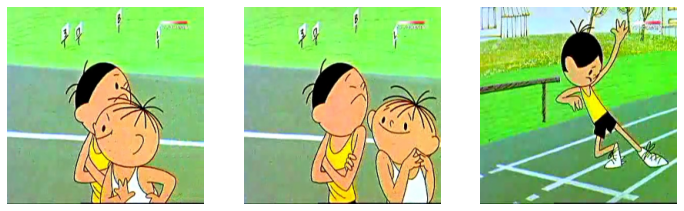

820/820 [==============================] - 85s 104ms/step - loss: 0.4474
Epoch 9
Black&White images


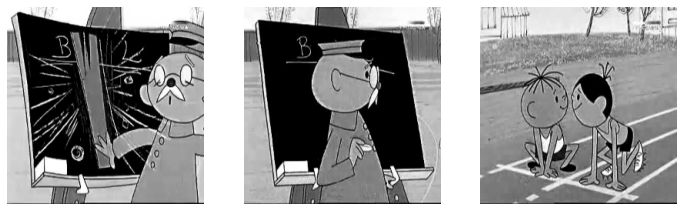

Colorized BW images


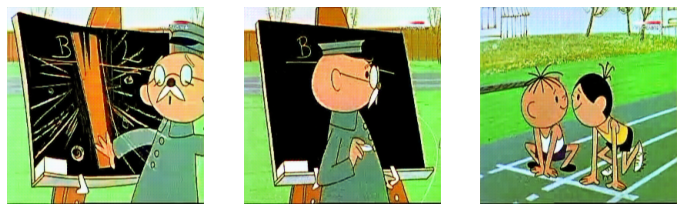

Original images


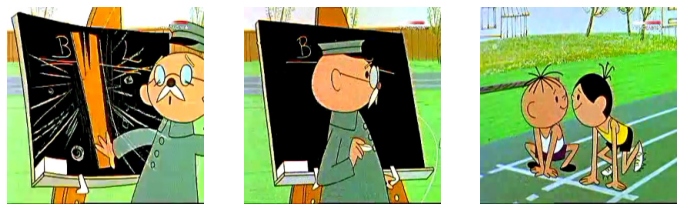

820/820 [==============================] - 85s 104ms/step - loss: 0.4447
Epoch 10
Black&White images


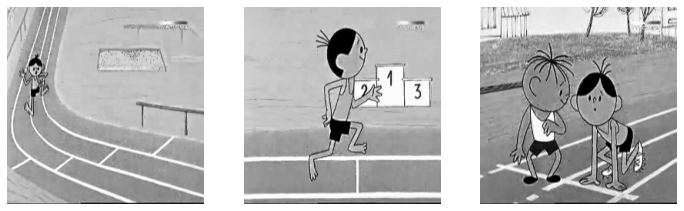

Colorized BW images


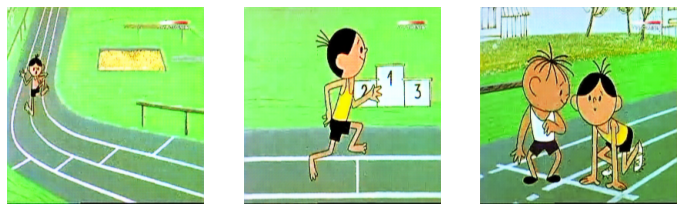

Original images


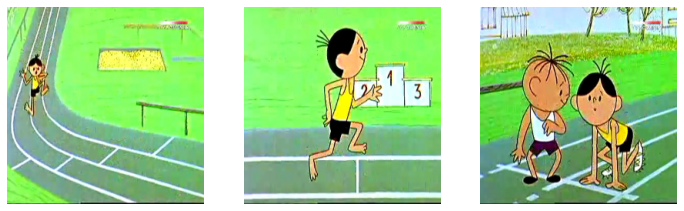

820/820 [==============================] - 85s 104ms/step - loss: 0.4434
Epoch 11
Black&White images


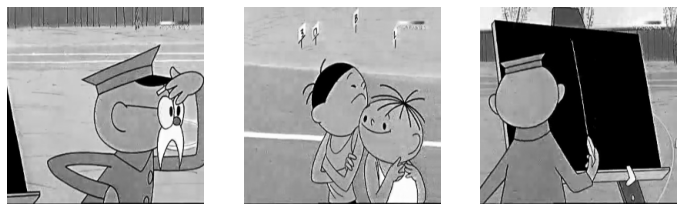

Colorized BW images


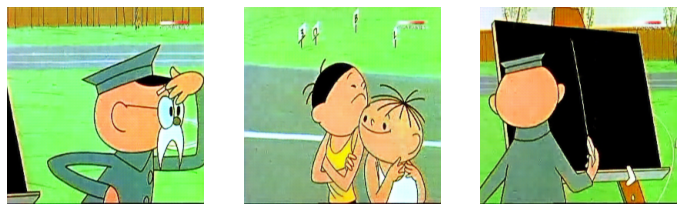

Original images


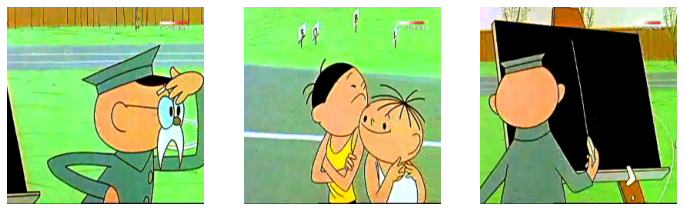

477/820 [================>.............] - ETA: 36s - loss: 0.4440

KeyboardInterrupt: 

In [11]:
for epoch in range(20):
    autoencoder.fit(bwImages, images, batch_size=2, epochs=1)
    if epoch%1==0:
        print("Epoch",epoch)
        show_images(bwImages,images)
    

Black&White images


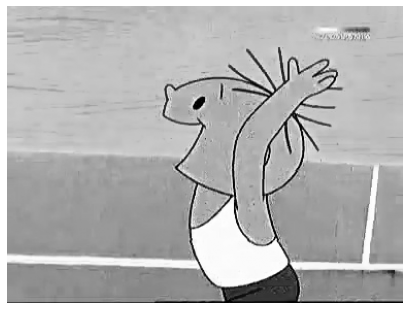

ValueError: in user code:

    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\layers\merge.py:183 call
        return self._merge_function(inputs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\layers\merge.py:522 _merge_function
        return K.concatenate(inputs, axis=self.axis)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\backend.py:2989 concatenate
        return array_ops.concat([to_dense(x) for x in tensors], axis)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\ops\array_ops.py:1677 concat
        return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\ops\gen_array_ops.py:1206 concat_v2
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\framework\func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\framework\ops.py:3528 _create_op_internal
        ret = Operation(
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\framework\ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    c:\programs\miniconda3\envs\gpu2\lib\site-packages\tensorflow\python\framework\ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimension 1 in both shapes must be equal, but are 4 and 3. Shapes are [?,4,4] and [?,3,3]. for '{{node model_1/concatenate/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](model_1/dropout/dropout/Mul_1, model_1/leaky_re_lu_6/LeakyRelu, model_1/concatenate/concat/axis)' with input shapes: [?,4,4,512], [?,3,3,512], [] and with computed input tensors: input[2] = <3>.


In [12]:

image = cv2.imread(f"bolek/frame1501.jpg")
#    image = cv2.resize(image, (size,size))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageBW = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageBW = np.expand_dims(imageBW,2)

image = np.expand_dims(image,0)
imageBW = np.expand_dims(imageBW,0)

image = image/255.0
imageBW = imageBW/255.0
imageBW = np.concatenate((imageBW,imageBW,imageBW),axis=3)
show_images(imageBW,image,1)